<a href="https://colab.research.google.com/github/2303A52095/EXPLAINABLE_AI_LAB/blob/main/Lab_Exam_EX_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Normalization and Z-Score (Standardization)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
df = pd.read_csv("/Students Social Media Addiction.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# --------- Min-Max Scaling (0–1) ---------
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# --------- Z-Score Standardization ---------
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])

# Save both files
df_minmax.to_csv("scaled_minmax.csv", index=False)
df_standard.to_csv("scaled_standardized.csv", index=False)

print("✅ Scaling complete!")
print("➡ Min-Max scaled file saved as: scaled_minmax.csv")
print("➡ Z-Score standardized file saved as: scaled_standardized.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/Students Social Media Addiction.csv'

2.Null Value Handling (Missing Data)

In [ ]:
import pandas as pd

# Load dataset
# df = pd.read_csv("Students Social Media Addiction.csv") # Removed this line as df is already loaded

# Handling Missing Values in one step
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        # Numeric column → use mean
        df[column] = df[column].fillna(df[column].mean())
    else:
        # Categorical column → use mode
        df[column] = df[column].fillna(df[column].mode()[0])

# Save cleaned dataset
df.to_csv("cleaned_missing_values.csv", index=False)

print("✅ Missing values handled successfully!")
print("➡ Cleaned file saved as: cleaned_missing_values.csv")

✅ Missing values handled successfully!
➡ Cleaned file saved as: cleaned_missing_values.csv


3.Imbalance / Balance Handling

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=500,      # total samples
                           n_features=5,       # number of features
                           n_classes=2,        # binary classification
                           weights=[0.9, 0.1], # 90% vs 10% imbalance
                           random_state=42)

print("Before SMOTE:", Counter(y))

# Step 2: Ensure target is numeric (SMOTE requirement)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({np.int64(0): 448, np.int64(1): 52})
After SMOTE: Counter({np.int64(0): 448, np.int64(1): 448})


4.Correlation Analysis

Correlation Matrix:
          A         B         C         D
A  1.000000  0.062209 -0.121598  0.037306
B  0.062209  1.000000 -0.111182  0.039173
C -0.121598 -0.111182  1.000000 -0.207600
D  0.037306  0.039173 -0.207600  1.000000


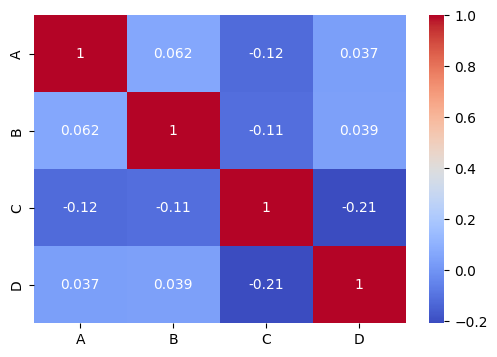


Dropped Columns: set()
Remaining Columns:
Index(['A', 'B', 'C', 'D'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'A': np.random.rand(50),
    'B': np.random.rand(50),
    'C': np.random.rand(50),
    'D': np.random.rand(50) * 0.9 + 0.1  # slightly correlated with others
})

# Correlation matrix
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Remove highly correlated features (threshold > 0.85)
threshold = 0.85
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

df_filtered = df.drop(columns=to_drop)

print("\nDropped Columns:", to_drop)
print("Remaining Columns:")
print(df_filtered.columns)


5.SHAP
(Basic Data Visualization Techniques AND Advanced Visualization Techniques


Dataset Sample:


,Age,Hours_on_Phone,Daily_Social_Media_Hours,Sleep_Hours,Academic_Score,Addicted
0,56,6,1.624994,8,46,1
1,46,8,2.633829,4,73,1
2,32,5,0.470738,5,54,1
3,25,4,0.152104,5,46,1
4,38,2,5.775890,9,42,0


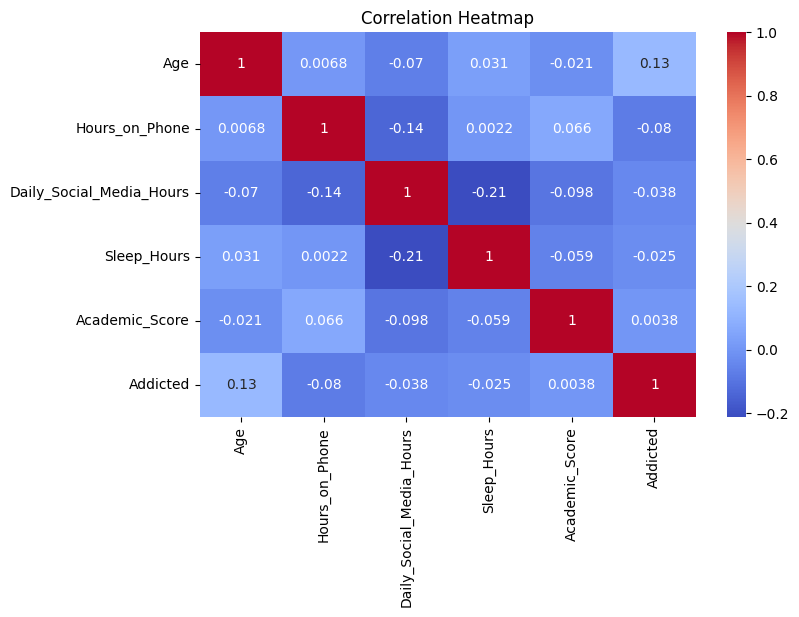


Highly correlated features removed: []


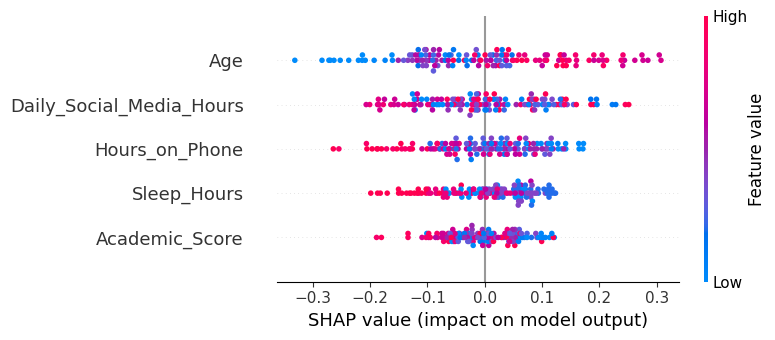

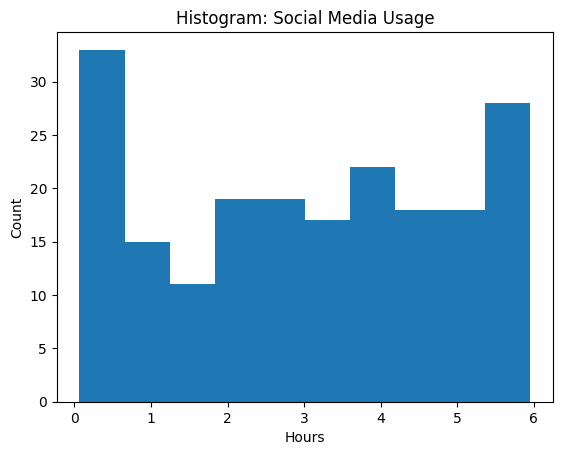

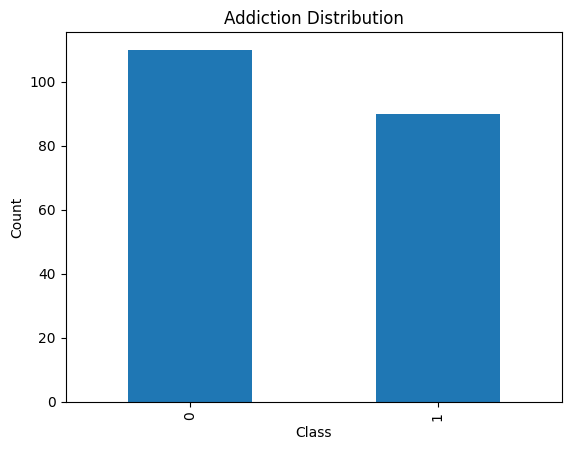

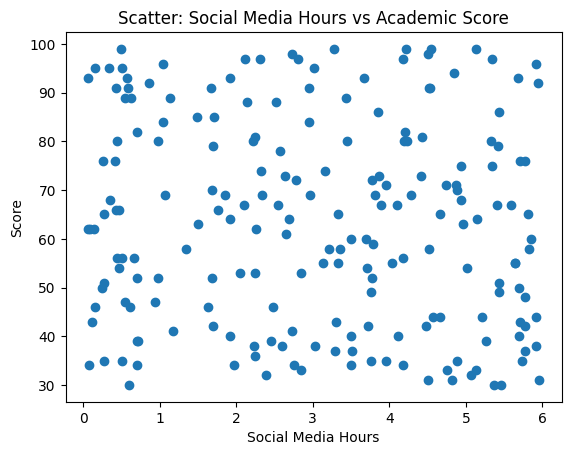

In [ ]:
# ✅ Correlation + SHAP + Visualization in ONE code

import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# -------------------------------
# 1️⃣ Create Dummy Dataset
# -------------------------------
np.random.seed(42)

df = pd.DataFrame({
    "Age": np.random.randint(18, 60, 200),
    "Hours_on_Phone": np.random.randint(1, 12, 200),
    "Daily_Social_Media_Hours": np.random.rand(200) * 6,
    "Sleep_Hours": np.random.randint(4, 10, 200),
    "Academic_Score": np.random.randint(30, 100, 200),
    "Addicted": np.random.randint(0, 2, 200)      # target
})

print("\nDataset Sample:")
display(df.head())

# -------------------------------
# 2️⃣ CORRELATION ANALYSIS
# -------------------------------
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Remove highly correlated features (corr > 0.85)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
drop_features = [column for column in upper.columns if any(upper[column] > 0.85)]

print("\nHighly correlated features removed:", drop_features)

df_clean = df.drop(columns=drop_features)

# -------------------------------
# 3️⃣ SHAP FEATURE IMPORTANCE
# -------------------------------
X = df_clean.drop("Addicted", axis=1)
y = df_clean["Addicted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# SHAP
explainer = shap.TreeExplainer(model)
# Use explainer(X_train) to get an Explanation object
shap_values = explainer(X_train)

# Global Feature Importance using the SHAP values for the positive class and the training data
# For binary classification, shap_values.values will have shape (n_samples, n_features, 2)
# We plot for the positive class (index 1)
shap.summary_plot(shap_values.values[:, :, 1], X_train, show=True)


# -------------------------------
# 4️⃣ BASIC VISUALIZATIONS
# -------------------------------

# Histogram
plt.figure()
plt.hist(df["Daily_Social_Media_Hours"])
plt.title("Histogram: Social Media Usage")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

# Bar Chart
plt.figure()
df["Addicted"].value_counts().plot(kind="bar")
plt.title("Addiction Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Scatter Plot
plt.figure()
plt.scatter(df["Daily_Social_Media_Hours"], df["Academic_Score"])
plt.title("Scatter: Social Media Hours vs Academic Score")
plt.xlabel("Social Media Hours")
plt.ylabel("Score")
plt.show()

Machine Learning Model:

                 Model  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression  0.945833   0.911290  0.982609  0.945607  0.987130
1        Decision Tree  0.937500   0.923729  0.947826  0.935622  0.937913
2                  KNN  0.887500   0.833333  0.956522  0.890688  0.956174


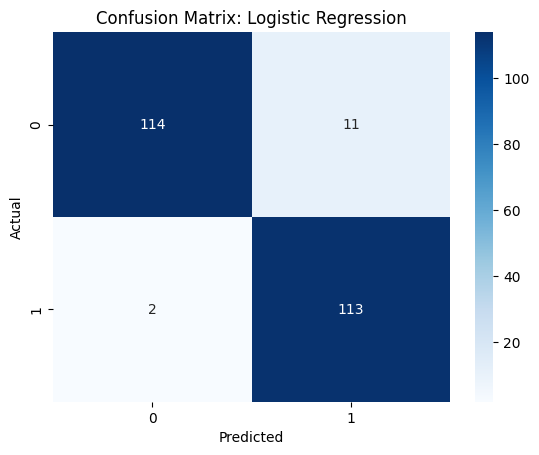

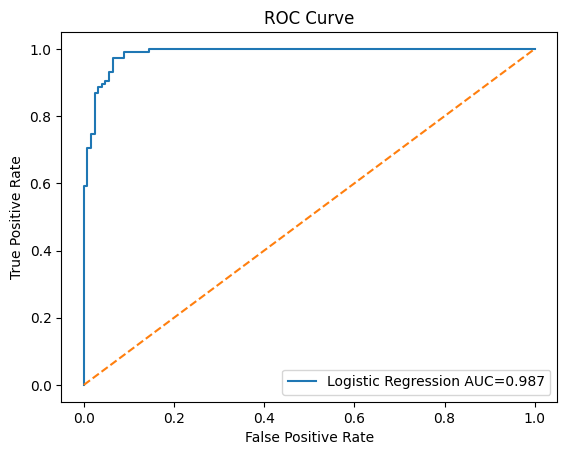

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ---- Load dataset (replace with your file) ----
# df = pd.read_csv("Students Social Media Addiction.csv")
# target_col = "Addicted"
# X = df.drop(columns=[target_col])
# y = df[target_col]

# Dummy dataset so code runs without a CSV
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=800, n_features=10, random_state=42)

# ---- Split + scale ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, prob)
    results.append([name, acc, prec, rec, f1, auc])

# ---- Print results ----
res_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
print(res_df)

# ---- Plot Confusion Matrix for best model ----
best = res_df.sort_values(by="AUC", ascending=False).iloc[0]
best_model_name = best["Model"]
best_model = models[best_model_name]

cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"{best_model_name} AUC={best['AUC']:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Deep Learning Model Metrics:

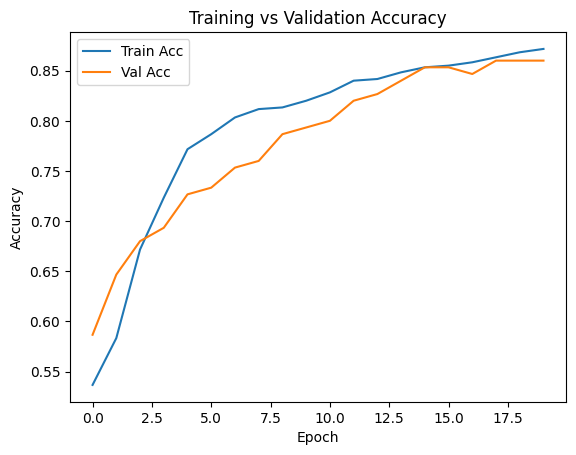

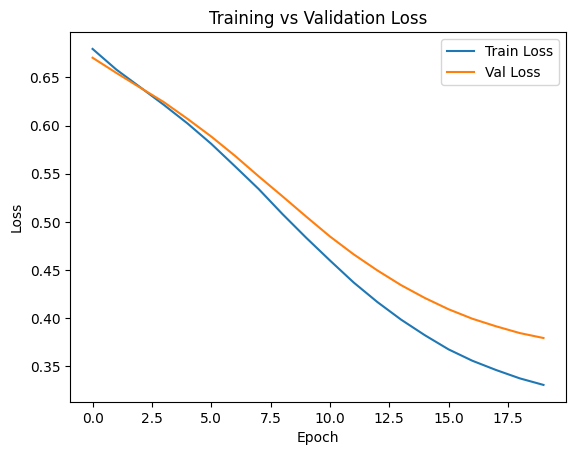

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Test Results:
Accuracy : 0.844
Precision: 0.9083333333333333
Recall   : 0.7956204379562044
F1-Score : 0.8482490272373541
AUC      : 0.9115690200891413


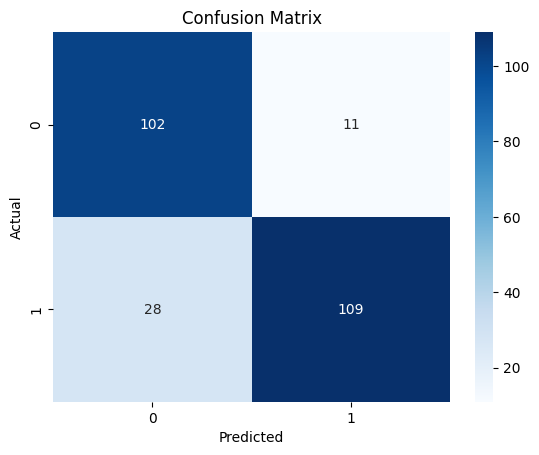

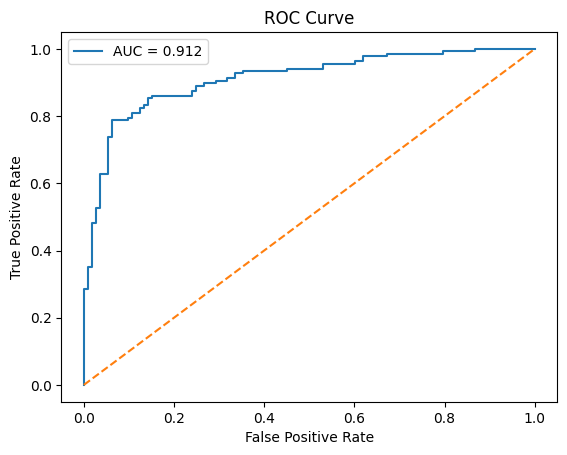

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ---- Dummy dataset so code runs without CSV ----
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# ---- Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ---- Scaling ----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Build Simple Neural Network ----
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')    # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# ---- Training/Validation Accuracy & Loss ----
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---- Evaluation on Test Set ----
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nTest Results:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-Score :", f1)
print("AUC      :", auc)

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- ROC CURVE ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
